In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src

Mounted at /content/gdrive
/content/gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src


In [4]:
input_file: str = '../data/BGL/BGL.log_structured.csv'
output_file_path: str = '../data/BGL/BGL-log.splitted.npz'

In [5]:
df = pd.read_csv(input_file)

df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d-%H.%M.%S.%f")

df['IsAnomaly'] = df['Label'] != '-'
g = df.groupby([pd.Grouper(key='Time', freq='6H'), 'EventId'])
h = df.groupby([pd.Grouper(key='Time', freq='6H')])
anomaly_df = h.apply(lambda x: x.loc[:, 'IsAnomaly'].any()).reset_index()

count_df = g.apply(lambda x: x.shape[0]).reset_index()
count_df.rename({0:'count'}, axis=1, inplace=True)

anomaly_df.rename({0:'IsAnomaly'}, axis=1, inplace=True)
merged = pd.merge(anomaly_df, count_df, how='outer', on='Time')

event_count_vector = merged.pivot(index=["Time", 'IsAnomaly'],
                                  columns="EventId",
                                  values='count').fillna(0).drop(columns=[np.NaN])

In [6]:
display(event_count_vector)

,EventId,01c4e373,02430fd4,0256fb0b,0315e48d,0328c31b,045f554d,04639923,04f5a2ae,0509d32d,05588c1a,...,f7c382bd,f80a5ed5,f97e57f1,f9df8a24,fac52822,fb1560b4,fb225cd2,fe297487,feaae979,ff52c40c
Time,IsAnomaly,,,,,,,,,,,,,,,,,,,,,
2005-06-03 12:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-06-03 18:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-06-04 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-06-04 06:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-06-04 12:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-11-17 06:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2005-11-17 12:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-11-17 18:00:00,True,0.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = event_count_vector.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(event_count_vector.values, i)
                          for i in range(len(event_count_vector.columns))]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


      feature           VIF
0    01c4e373           inf
1    02430fd4  4.188162e+07
2    0256fb0b           inf
3    0315e48d           inf
4    0328c31b  9.395508e+06
..        ...           ...
344  fb1560b4  3.943215e+07
345  fb225cd2           inf
346  fe297487           inf
347  feaae979  2.555691e+03
348  ff52c40c  2.551506e+02

[349 rows x 2 columns]


In [8]:
display(vif_data)

,feature,VIF
0,01c4e373,inf
1,02430fd4,4.188162e+07
2,0256fb0b,inf
3,0315e48d,inf
4,0328c31b,9.395508e+06
...,...,...
344,fb1560b4,3.943215e+07
345,fb225cd2,inf
346,fe297487,inf
347,feaae979,2.555691e+03


In [9]:
vif_data_sorted = vif_data.sort_values(by=['VIF'])

Text(0.5, 1.0, 'Original features VIF')

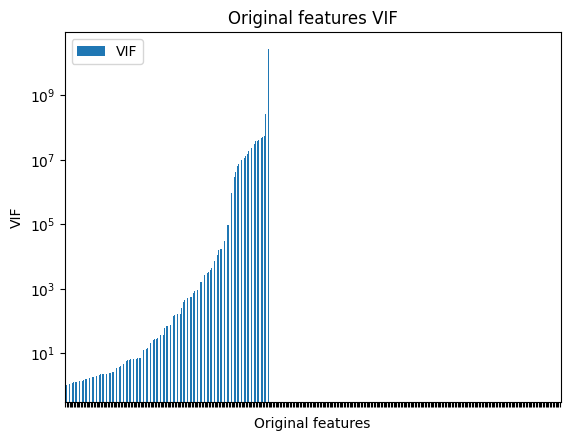

In [34]:
plot = vif_data_sorted.plot(x='feature', y='VIF', kind='bar', logy=True)
plot.set_xticklabels([])
plot.set_xlabel('Original features')
plot.set_ylabel('VIF')
plot.set_title('Original features VIF')

In [11]:
event_ids = event_count_vector.columns.to_numpy()

In [12]:
event_ids_pd = pd.DataFrame(event_ids)
event_ids_pd.to_csv('../data/BGL/BGL.event_ids.csv')

In [13]:
train, test = train_test_split(event_count_vector, test_size=0.2)

test_y = test.reset_index(level='IsAnomaly')['IsAnomaly'].to_numpy() * 1
train_y = train.reset_index(level='IsAnomaly')['IsAnomaly'].to_numpy() * 1
test_x = test.reset_index(level='IsAnomaly').drop(columns=['IsAnomaly']).to_numpy()
train_x = train.reset_index(level='IsAnomaly').drop(columns=['IsAnomaly']).to_numpy()

In [14]:
display(train_x)

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 6.144e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [15]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
train_x.shape

(537, 349)

In [16]:
X = event_count_vector.reset_index().drop(['Time', 'IsAnomaly'], axis=1).to_numpy()
display(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = event_count_vector.reset_index()['IsAnomaly'].to_numpy() * 1
display(y)

In [39]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_l1 = model.transform(X)
X_l1.shape

(672, 59)

In [19]:
event_count_vector_l1 = np.concatenate((X_l1, y.reshape(-1, 1)), axis=1)
train, test = train_test_split(event_count_vector_l1, test_size=0.2)
event_count_vector_l1.shape

(672, 60)

In [21]:
train_l1, test_l1 = train_test_split(event_count_vector_l1, test_size=0.2)

test_l1_y = test_l1[:, -1:].reshape(-1)
train_l1_y = train_l1[:, -1:].reshape(-1)
test_l1_x = test_l1[:, :-1]
train_l1_x = train_l1[:, :-1]

In [22]:
print(test_l1_y.shape)
print(train_l1_y.shape)
print(test_l1_x.shape)
print(train_l1_x.shape)

(135,)
(537,)
(135, 59)
(537, 59)


In [23]:
print(test_y.shape)
print(train_y.shape)
print(test_x.shape)
print(train_x.shape)

(135,)
(537,)
(135, 349)
(537, 349)


In [27]:
# VIF dataframe
vif_data_l1 = pd.DataFrame()
vif_data_l1["feature"] = event_count_vector_l1[1]

# calculating VIF for each feature
vif_data_l1["VIF"] = [variance_inflation_factor(event_count_vector_l1, i)
                          for i in range(len(event_count_vector_l1[1]))]

print(vif_data_l1)

    feature        VIF
0       0.0   1.049703
1       0.0   1.222441
2       0.0   1.006504
3       0.0   1.691984
4       0.0   1.086928
5       0.0   1.088487
6       0.0   1.588901
7      30.0  23.150530
8       0.0   1.092825
9       0.0   1.218643
10      0.0   7.608560
11      0.0   1.022612
12      0.0   2.413484
13      0.0  14.203008
14      0.0   1.162901
15      0.0   4.458163
16      0.0   1.012634
17      0.0   1.164201
18      0.0   1.091586
19      0.0   1.178867
20      0.0   2.030003
21      0.0   7.279535
22      0.0   1.404937
23      0.0   1.751885
24      0.0   1.051584
25      0.0   1.936057
26      0.0   1.047314
27      8.0   1.516444
28      0.0   1.039331
29      7.0   1.552582
30      0.0   1.144385
31      0.0   2.301084
32    497.0   3.497669
33      0.0   1.474354
34      0.0   1.371176
35      0.0        inf
36      0.0   7.559150
37      0.0   1.092558
38      0.0   1.259966
39      0.0  20.249081
40      0.0   1.049414
41      0.0        inf
42      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [30]:
vif_data_l1_sorted = vif_data_l1.sort_values(by=['VIF'])

Text(0.5, 1.0, 'Regularized features VIF')

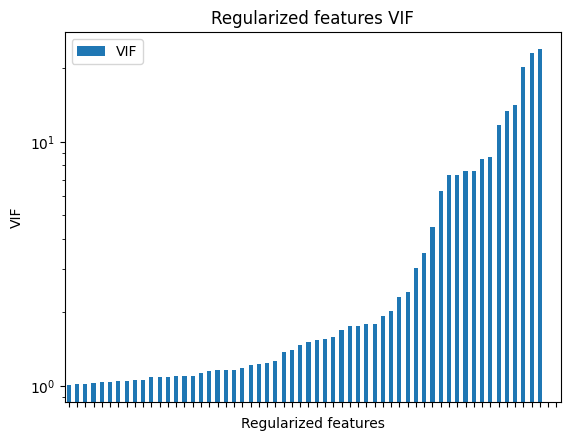

In [33]:
plot = vif_data_l1_sorted.plot(x='feature', y='VIF', kind='bar', logy=True)
plot.set_xticklabels([])
plot.set_xlabel('Regularized features')
plot.set_ylabel('VIF')
plot.set_title('Regularized features VIF')

In [ ]:
np.savez(output_file_path,
          x_train=train_x,
          y_train=train_y,
          x_test=test_x,
          y_test=test_y,
          x_train_l1=train_l1_x,
          y_train_l1=train_l1_y,
          x_test_l1=test_l1_x,
          y_test_l1=test_l1_y)